# Email spam Detection with Machine Learning

Dataset: "spam.csv"

importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loading dataset

In [5]:
df = pd.read_csv('spam.csv', encoding='latin-1')

Dataset inspection

In [7]:
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [8]:
# Keep only the relevant columns
df = df[['v1', 'v2']]

# Rename columns
df.columns = ['label', 'text']

# Check first few rows
print(df.head())

# Check class distribution
print("\nClass Distribution:\n", df['label'].value_counts())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Class Distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64


Text Preprocessing

In [ ]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Check the result
print(df[['text', 'clean_text']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumai\AppData\Roaming\nltk_data...


                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                          clean_text  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


[nltk_data]   Unzipping corpora\stopwords.zip.
C:\Users\sumai\AppData\Local\Temp\ipykernel_14064\2615155916.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['text'].apply(preprocess_text)


Dataset is ready for feature extraction, which is the next step. For emails, a common approach is TF-IDF vectorization.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features and labels
X = df['clean_text']
y = df['label'].map({'ham': 0, 'spam': 1})  # encode labels as 0 and 1

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)  # you can adjust max_features
X_vectorized = vectorizer.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])


Training samples: 4457
Test samples: 1115


For spam detection, a very effective and simple choice is **Multinomial Naive Bayes** because it works well with text features like TF-IDF.

### Model: Multinomial Naive Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.97847533632287

Confusion Matrix:
 [[965   0]
 [ 24 126]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



### Visualization Evaluation of Spam email detection

C:\Users\sumai\AppData\Local\Temp\ipykernel_14064\727016532.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['email_length'] = df['text'].apply(len)
C:\Users\sumai\AppData\Local\Temp\ipykernel_14064\727016532.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2', ax=axes[0,0])
C:\Users\sumai\AppData\Local\Temp\ipykernel_14064\727016532.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=lis

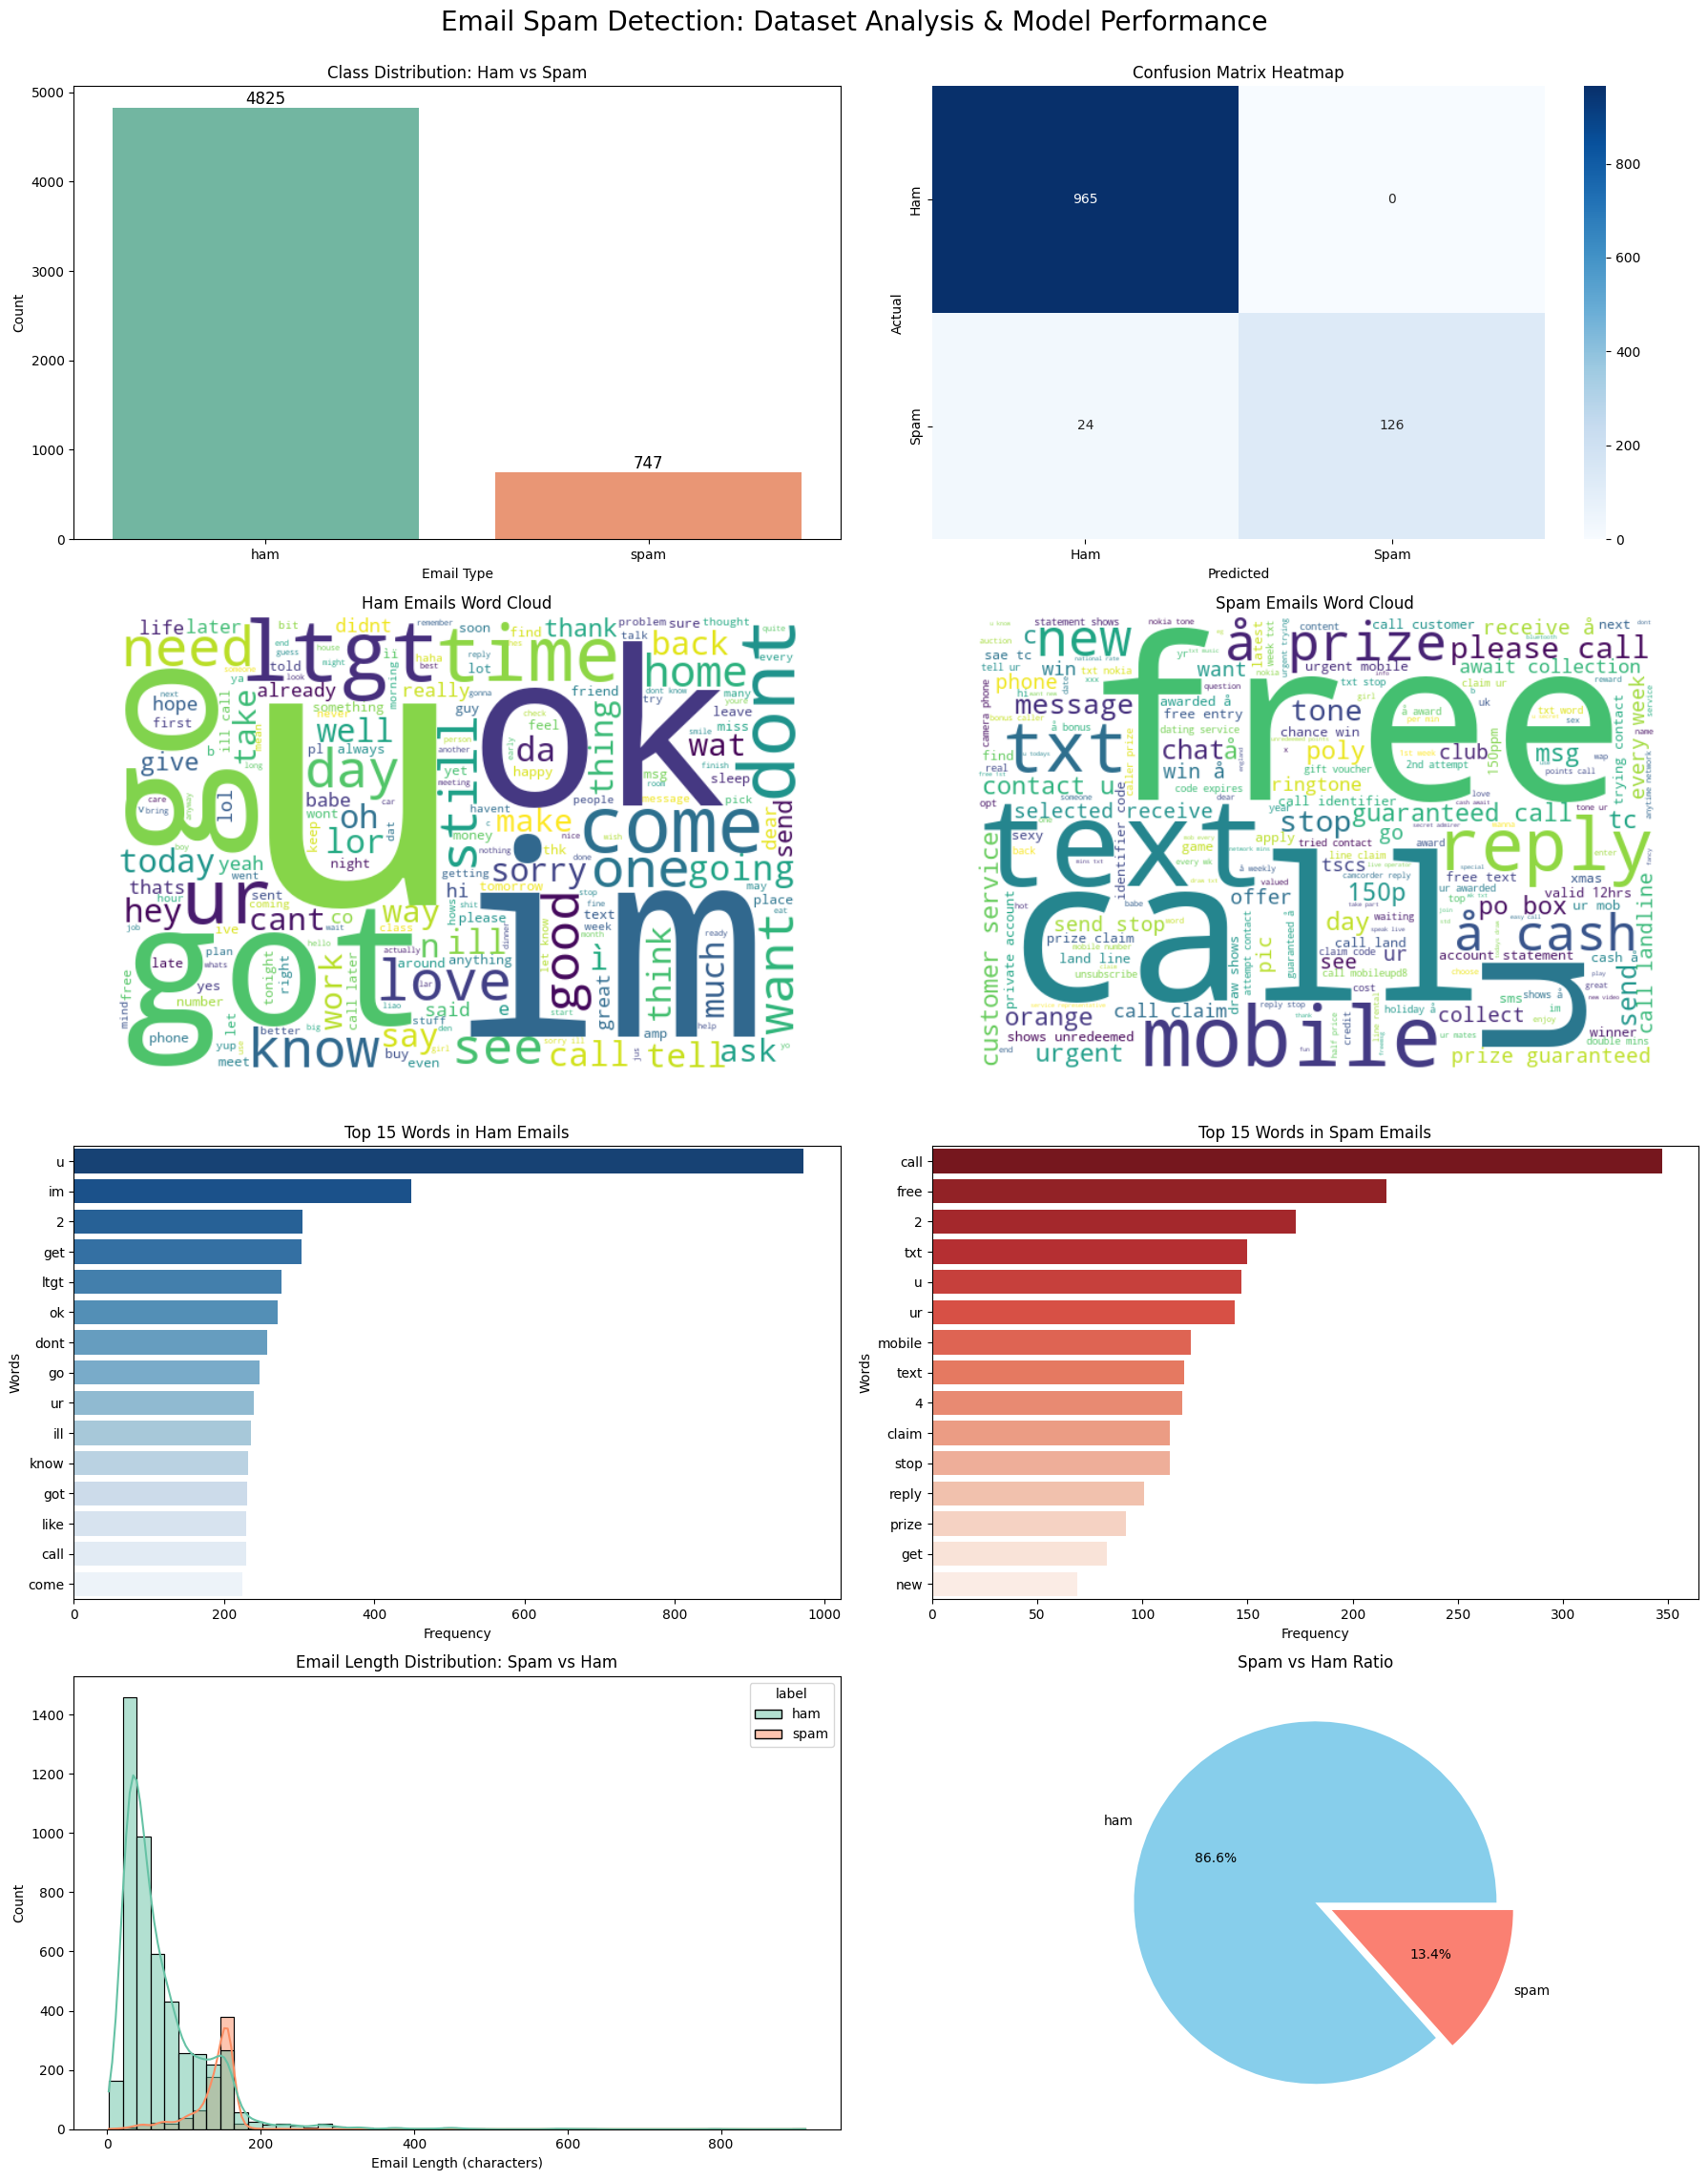

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.metrics import confusion_matrix


df['email_length'] = df['text'].apply(len)

# Creating a 4-row, 2-column figure
fig, axes = plt.subplots(4, 2, figsize=(18, 24))

# Adding a main title
fig.suptitle("Email Spam Detection: Dataset Analysis & Model Performance", fontsize=20, y=0.95)

# -----------------------------
# Row 1, Column 1: Class Distribution
# -----------------------------
sns.countplot(x='label', data=df, palette='Set2', ax=axes[0,0])
for p in axes[0,0].patches:
    axes[0,0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2., p.get_height()),
                       ha='center', va='bottom', fontsize=12)
axes[0,0].set_title("Class Distribution: Ham vs Spam")
axes[0,0].set_xlabel("Email Type")
axes[0,0].set_ylabel("Count")

# -----------------------------
# Row 1, Column 2: Confusion Matrix Heatmap
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'], ax=axes[0,1])
axes[0,1].set_xlabel("Predicted")
axes[0,1].set_ylabel("Actual")
axes[0,1].set_title("Confusion Matrix Heatmap")

# -----------------------------
# Row 2, Column 1: Ham Word Cloud
# -----------------------------
ham_text = ' '.join(df[df['label']=='ham']['clean_text'])
wordcloud_ham = WordCloud(width=600, height=400, background_color='white').generate(ham_text)
axes[1,0].imshow(wordcloud_ham, interpolation='bilinear')
axes[1,0].axis('off')
axes[1,0].set_title("Ham Emails Word Cloud")

# -----------------------------
# Row 2, Column 2: Spam Word Cloud
# -----------------------------
spam_text = ' '.join(df[df['label']=='spam']['clean_text'])
wordcloud_spam = WordCloud(width=600, height=400, background_color='white').generate(spam_text)
axes[1,1].imshow(wordcloud_spam, interpolation='bilinear')
axes[1,1].axis('off')
axes[1,1].set_title("Spam Emails Word Cloud")

# -----------------------------
# Row 3, Column 1: Top 15 Words in Ham
# -----------------------------
all_ham_words = ' '.join(df[df['label']=='ham']['clean_text']).split()
ham_counts = Counter(all_ham_words).most_common(15)
words, counts = zip(*ham_counts)
sns.barplot(x=list(counts), y=list(words), palette='Blues_r', ax=axes[2,0])
axes[2,0].set_title("Top 15 Words in Ham Emails")
axes[2,0].set_xlabel("Frequency")
axes[2,0].set_ylabel("Words")

# -----------------------------
# Row 3, Column 2: Top 15 Words in Spam
# -----------------------------
all_spam_words = ' '.join(df[df['label']=='spam']['clean_text']).split()
spam_counts = Counter(all_spam_words).most_common(15)
words, counts = zip(*spam_counts)
sns.barplot(x=list(counts), y=list(words), palette='Reds_r', ax=axes[2,1])
axes[2,1].set_title("Top 15 Words in Spam Emails")
axes[2,1].set_xlabel("Frequency")
axes[2,1].set_ylabel("Words")

# -----------------------------
# Row 4, Column 1: Email Length Distribution
# -----------------------------
sns.histplot(data=df, x='email_length', hue='label', bins=50, palette='Set2', kde=True, ax=axes[3,0])
axes[3,0].set_title("Email Length Distribution: Spam vs Ham")
axes[3,0].set_xlabel("Email Length (characters)")
axes[3,0].set_ylabel("Count")

# -----------------------------
# Row 4, Column 2: Spam vs Ham Ratio Pie Chart
# -----------------------------
df['label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue','salmon'],
                                    explode=[0,0.1], ax=axes[3,1])
axes[3,1].set_title("Spam vs Ham Ratio")
axes[3,1].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # adjust layout to fit suptitle
plt.show()


## Email Spam Detection Dataset: Visualization Insights

### Top Left (Bar Chart): Class Distribution – Ham vs Spam
Shows the total count of "ham" (legitimate) emails (4,825) versus "spam" emails (747), highlighting the dataset's class imbalance.

### Top Right (Heatmap): Confusion Matrix
Visualizes the model's performance by showing correctly and incorrectly classified emails, including True Positives, False Positives, True Negatives, and False Negatives.

### Middle Left (Word Cloud): Ham Emails
Highlights the most frequent and prominent words in "ham" (non-spam) emails, e.g., 'ltgt' and 'ok'.

### Middle Right (Word Cloud): Spam Emails
Illustrates the most frequent and prominent words in "spam" emails, e.g., 'free', 'call', 'text', and 'mobile'.

### Lower Middle Left (Bar Chart): Top 15 Words in Ham Emails
Displays the top 15 most frequent words and their counts in "ham" emails.

### Lower Middle Right (Bar Chart): Top 15 Words in Spam Emails
Displays the top 15 most frequent words and their counts in "spam" emails.

### Bottom Left (Histogram): Email Length Distribution – Spam vs Ham
Compares the distribution of email lengths (in characters) for "spam" and "ham" emails, showing that ham emails tend to be longer.

### Bottom Right (Pie Chart): Spam vs Ham Ratio
Illustrates the percentage ratio of "ham" (86.6%) to "spam" (13.4%) emails in the dataset.


# Email spam detection is done succesfully !